In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import cv2
import os
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6281367088213412504
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4850712576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 551614113342862971
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
import hub
data_train = hub.load("hub://activeloop/LFPW-train").tensorflow()
data_test = hub.load("hub://activeloop/LFPW-test").tensorflow()

hub://activeloop/LFPW-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/LFPW-train
hub://activeloop/LFPW-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/LFPW-test


tf.Tensor([178], shape=(1,), dtype=int32)
tf.Tensor([184], shape=(1,), dtype=int32)
tf.Tensor([193], shape=(1,), dtype=int32)
tf.Tensor([200], shape=(1,), dtype=int32)
tf.Tensor([192], shape=(1,), dtype=int32)
tf.Tensor([183], shape=(1,), dtype=int32)
tf.Tensor([235], shape=(1,), dtype=int32)
tf.Tensor([243], shape=(1,), dtype=int32)
tf.Tensor([251], shape=(1,), dtype=int32)
tf.Tensor([259], shape=(1,), dtype=int32)
tf.Tensor([252], shape=(1,), dtype=int32)
tf.Tensor([244], shape=(1,), dtype=int32)


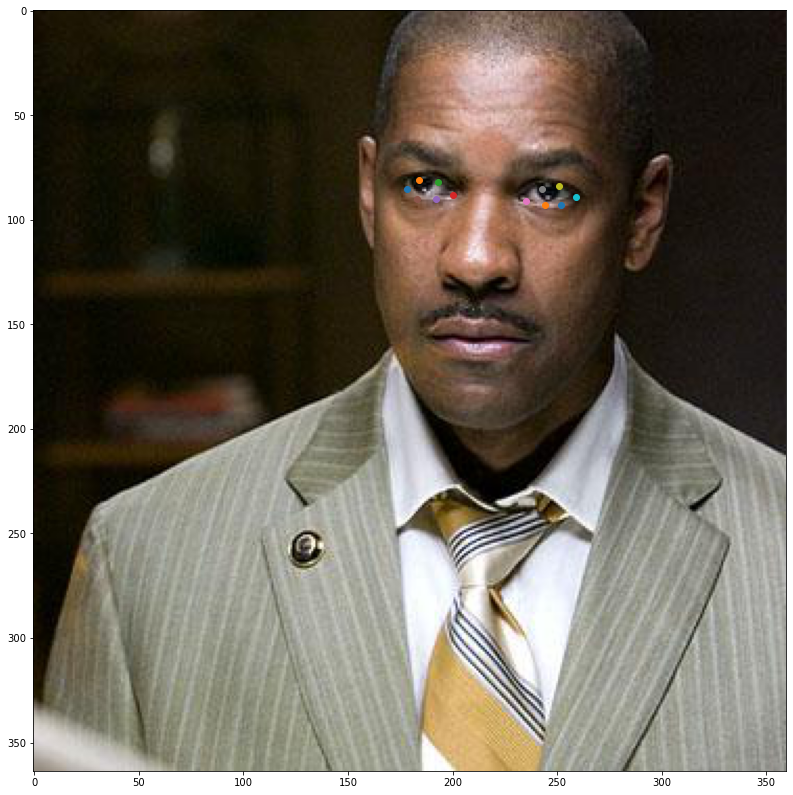

In [3]:
fig, ax = plt.subplots(figsize=(14, 14))
for i in data_train:
    ax.imshow(i["images"])
    index=0
    for j in range(0, len(i["keypoints"]), 3):
        index+=1
        if index > 36 and index < 49:
            print(i["keypoints"][j])
            ax.scatter(i["keypoints"][j],i["keypoints"][j+1])
    break

In [4]:
# images쪽만 수집
train_images = []
test_images = []
# keypoints쪽만 수집
train_annotation = []
test_annotation = []

# data_train부분 데이터 전처리
for i in data_train:
    train_image = np.array(i["images"])
#     image == color일때만 list에 저장
    if i["images"].shape[2] !=3:
        continue
    train_images.append(train_image)
#     keypoints쪽 list에 저장
    train_annotation.append(np.array(i["keypoints"]))
print("Train convert done")

# data_test부분 데이터 전처리
# 위와 동일
for i in data_test:
    test_image = np.array(i["images"])
    test_images.append(test_image)
    test_annotation.append(np.array(i["keypoints"]))
print("Test convert done")

Train convert done
Test convert done


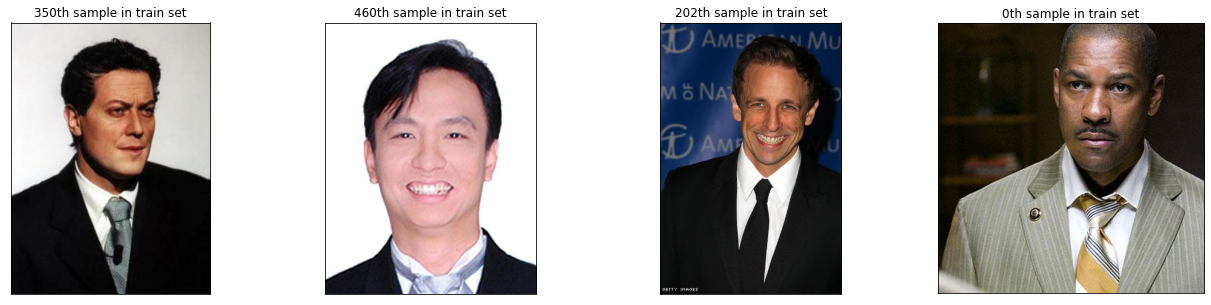

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(22, 5))
for i in range(4):
    index = np.random.randint(500)
    ax[i].imshow(train_images[index])
    ax[i].set_title("{}th sample in train set".format(index))
    ax[i].xaxis.set_ticks([])
    ax[i].yaxis.set_ticks([])

In [6]:
path = "D:LFPW/"
if (path + "/train_image.npy") == True:
    pass
else:
# train, test저장(images, keypoints 분리해서)
    np.save("D:LFPW/train_image.npy", train_images)
    np.save("D:LFPW/train_annotation.npy", train_annotation)
    np.save("D:LFPW/test_image.npy", test_images)
    np.save("D:LFPW/test_annotation.npy", test_annotation)

C:\Users\cym80\Anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [7]:
# images가 잘 저장되어있는지 확인
load = np.load("D:LFPW/train_image.npy",allow_pickle=True)

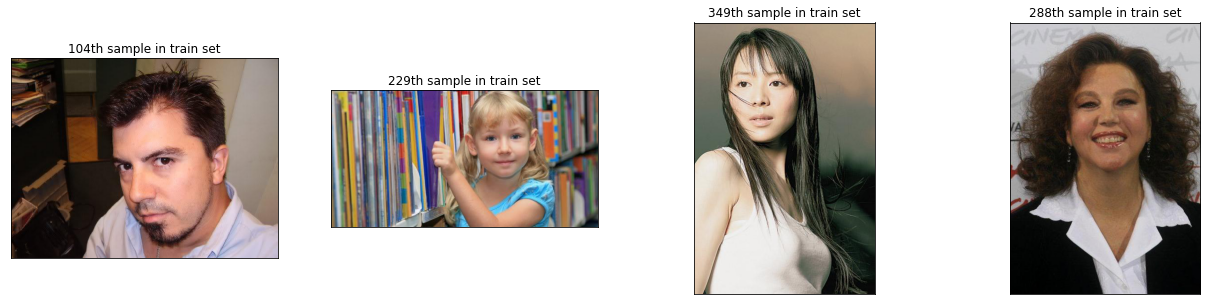

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(22, 5))
for i in range(4):
    index = np.random.randint(500)
    ax[i].imshow(load[index])
    ax[i].set_title("{}th sample in train set".format(index))
    ax[i].xaxis.set_ticks([])
    ax[i].yaxis.set_ticks([]) 

In [9]:
path = "D:/LFPW"
train_image_orgin = np.load(os.path.join(path,"train_image.npy"), allow_pickle=True)
train_annotation_orgin = np.load(os.path.join(path,"train_annotation.npy"), allow_pickle=True)
test_image_orgin = np.load(os.path.join(path,"test_image.npy"), allow_pickle=True)
test_annotation_orgin = np.load(os.path.join(path,"test_annotation.npy"), allow_pickle=True)

In [10]:
train_image = train_image_orgin.copy()
train_annotation = train_annotation_orgin.copy()
test_image = test_image_orgin.copy()
test_annotation = test_annotation_orgin.copy()

In [11]:
def make_dataset_float(X, size):
    img_data = []
    for image in X:
        image = cv2.resize(image, (size, size), interpolation=cv2.INTER_NEAREST)
        image = image.astype('float32')
        image /= 255 
        img_data.append(image)
    return np.array(img_data)

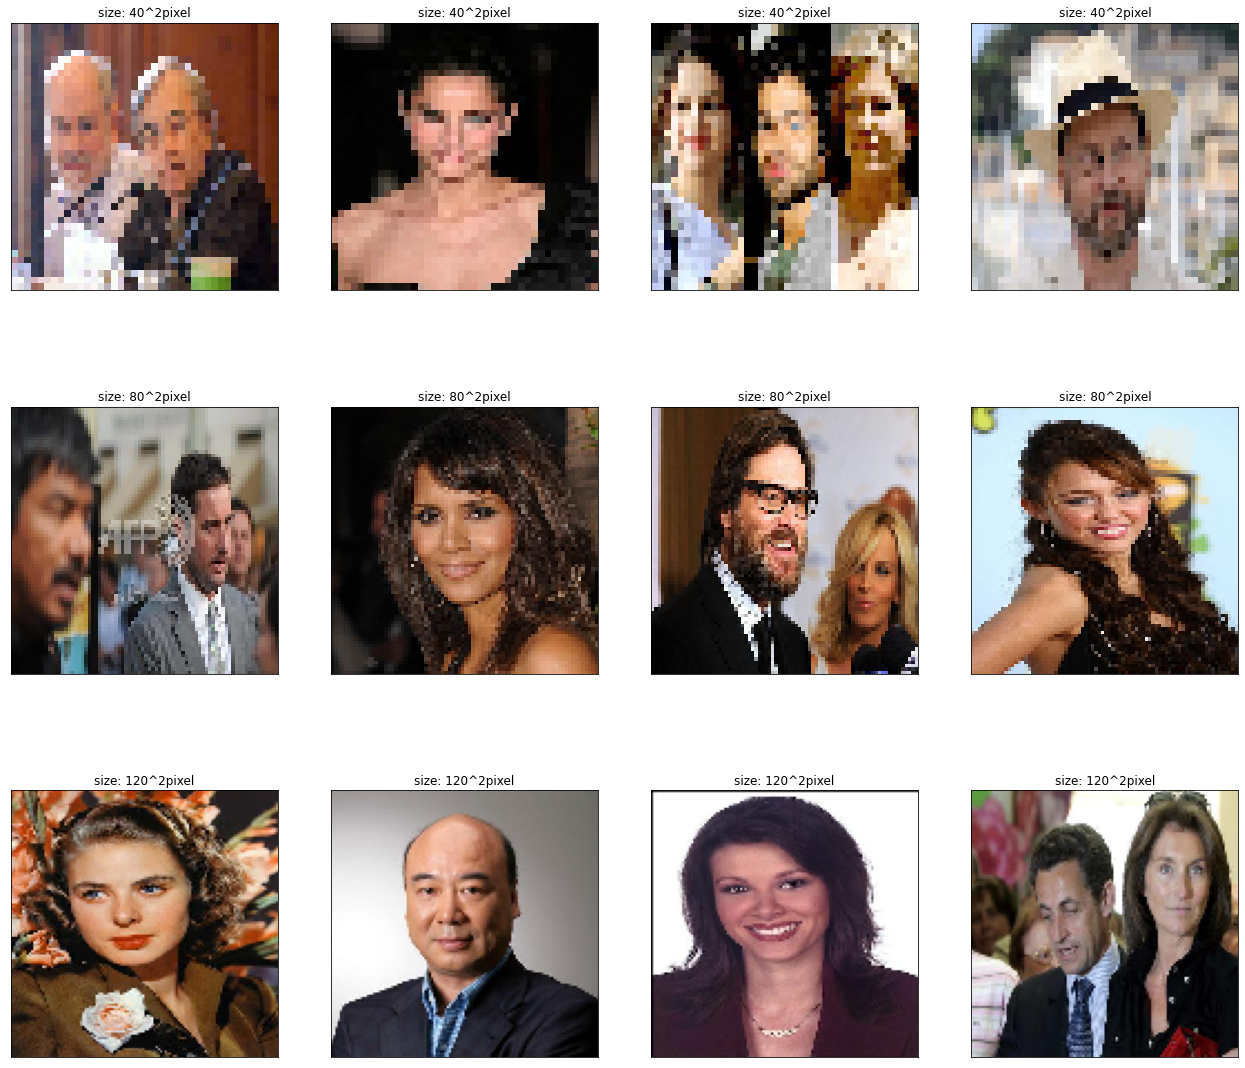

In [12]:
fig, ax = plt.subplots(3, 4, figsize=(22, 20))
for i in range(12):
    j = i//4
    k = i%4
    dataset = make_dataset_float(test_image, (j+1)*40)
    index = np.random.randint(len(dataset))
    ax[j][k].imshow(dataset[index])
    ax[j][k].set_title("size: {}^2pixel".format((j+1)*40))
    ax[j][k].xaxis.set_ticks([])
    ax[j][k].yaxis.set_ticks([])

In [13]:
train_anno = []
test_anno = []
for i in train_annotation:
    index=0
    for j in range(0, len(train_annotation), 3):
        index+=1
        if index > 36 and index < 49:
            train_anno.append([i[j], i[j+1]])
            
for i in test_annotation:
    index=0
    for j in range(0, len(test_annotation), 3):
        index+=1
        if index > 36 and index < 49:
            test_anno.append([i[j], i[j+1]])
train_anno = np.reshape(train_anno, (len(train_annotation), 24))
test_anno = np.reshape(test_anno, (len(test_annotation), 24))

In [14]:
np.array(train_annotation).shape

(781, 204, 1)

In [15]:
train_anno.shape

(781, 24)

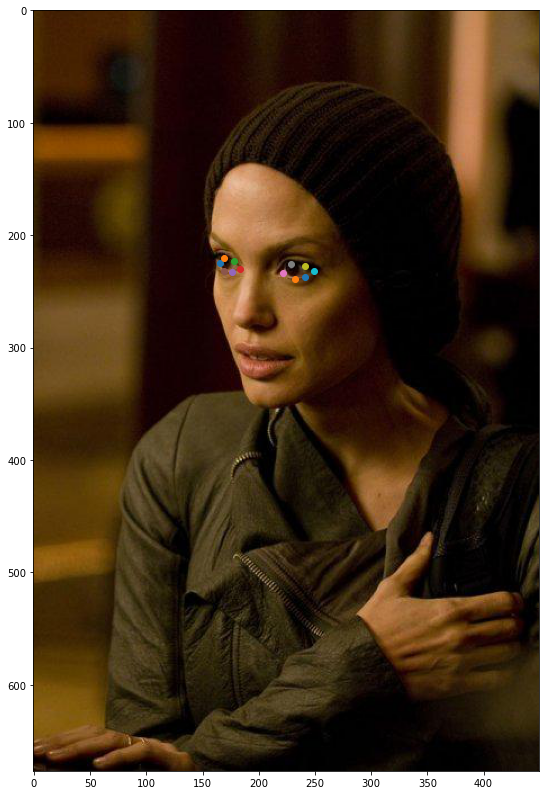

In [16]:
picture_num = 4
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(train_image[picture_num])
for i in range(0, 24, 2):
    ax.scatter(train_anno[picture_num][i], train_anno[picture_num][i+1])

In [17]:
len(train_image[0])

364

In [18]:
len(train_anno)

781

640

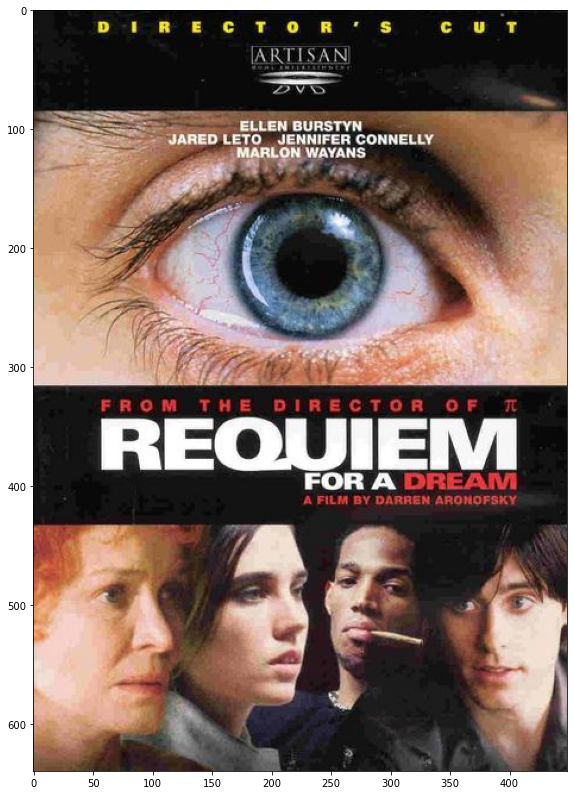

In [19]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(train_image[2])
len(train_image[2])

In [20]:
def make_dataset_keypoints(X, keypoint, size):
    keypoint_list = []
    for j in range(0, len(keypoint)):
        for i in range(0, len(keypoint[j])):
            check = 0
            if i % 2 == 0:
                check = ((keypoint[j][i] * size) / len(X[j][0]))
#                 keypoint_list.append(keypoint[i]*(size / len(X[j][0])))
            else:
                check = ((keypoint[j][i] * size) / len(X[j]))
#                 keypoint_list.append(keypoint[i]*(size / len(X[j])))
            keypoint_list.append(check)
    return np.array(keypoint_list)

In [21]:
len(train_anno)

781

In [22]:
y_train_check = make_dataset_keypoints(train_image, train_anno, 160)
y_test_check = make_dataset_keypoints(test_image, test_anno, 160)
y_train_check = np.reshape(y_train_check, (len(train_anno), 24))
y_test_check = np.reshape(y_test_check, (len(test_anno), 24))
y_train_check

array([[ 79.11111111,  37.36263736,  81.77777778, ...,  40.87912088,
        108.44444444,  40.87912088],
       [ 47.75384615,  42.42696629,  50.70769231, ...,  44.58426966,
         79.75384615,  44.94382022],
       [ 19.59910913, 124.        ,  21.73719376, ..., 124.        ,
         39.91091314, 124.        ],
       ...,
       [ 77.16129032,  67.72093023,  78.96774194, ...,  63.62790698,
        100.38709677,  64.37209302],
       [ 57.87234043,  56.        ,  60.30395137, ...,  56.64      ,
         87.05167173,  56.64      ],
       [ 56.47058824,  32.        ,  58.72941176, ...,  34.25      ,
         80.56470588,  34.25      ]])

In [23]:
y_train_check.shape

(781, 24)

In [24]:
train_anno[0]

array([178,  85, 184,  81, 193,  82, 200,  88, 192,  90, 183,  90, 235,
        91, 243,  85, 251,  84, 259,  89, 252,  93, 244,  93])

In [25]:
size = 200
X_train = make_dataset_float(train_image, size)
X_test = make_dataset_float(test_image, size)
y_train = train_anno
y_test = test_anno
print(y_train.shape)
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
y_train_check = make_dataset_keypoints(train_image, train_anno, size)
y_test_check = make_dataset_keypoints(test_image, test_anno, size)
y_train_check = np.reshape(y_train_check, (len(train_anno), 24))
y_test_check = np.reshape(y_test_check, (len(test_anno), 24))

(781, 24)


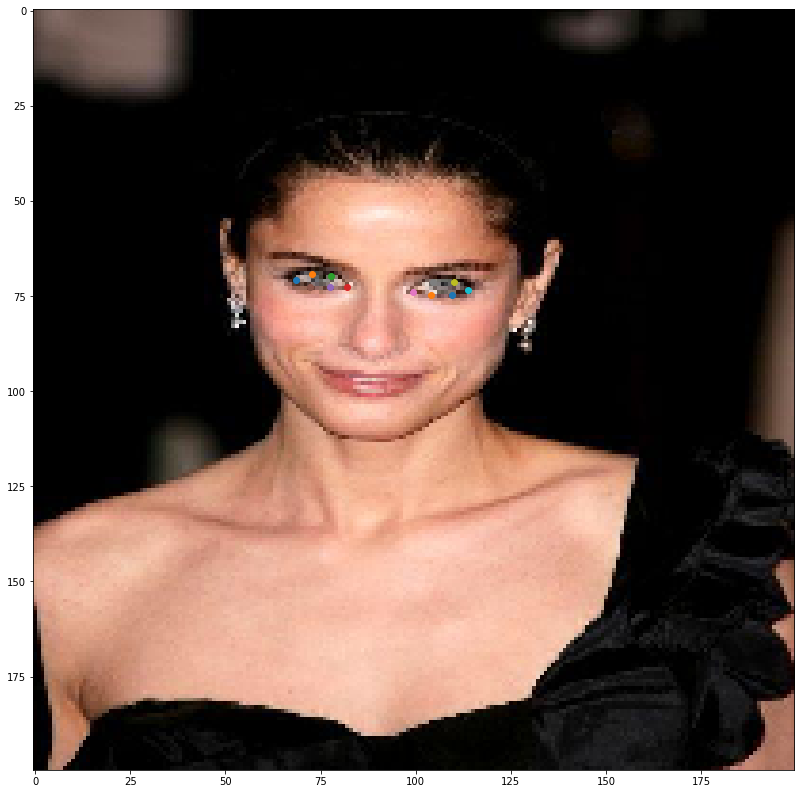

In [26]:
picture_num = 1
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(X_test[picture_num])
for i in range(0, 24, 2):
    ax.scatter(y_test_check[picture_num][i], y_test_check[picture_num][i+1])

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 3, 1, activation="relu",
                              kernel_initializer="he_normal",
                              input_shape = (size, size, 3)))
model.add(keras.layers.Conv2D(64, 3, 1, activation="selu",
                              kernel_initializer="lecun_normal"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, 3, 1, activation="selu",
                            kernel_initializer="lecun_normal"))
model.add(keras.layers.Conv2D(128, 3, 1, activation="selu",
                            kernel_initializer="lecun_normal"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(24, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics="mse")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 1131008)           0         
                                                        

In [29]:
model.fit(X_train, y_train_check, validation_data = (X_test, y_test_check),
          epochs=20)

Epoch 1/20
25/25 [==============================] - 11s 299ms/step - loss: 42027.2891 - mse: 42027.2891 - val_loss: 2343.0300 - val_mse: 2343.0300
Epoch 2/20
25/25 [==============================] - 6s 244ms/step - loss: 2021.5914 - mse: 2021.5914 - val_loss: 1026.8909 - val_mse: 1026.8909
Epoch 3/20
25/25 [==============================] - 6s 244ms/step - loss: 732.4688 - mse: 732.4688 - val_loss: 747.1620 - val_mse: 747.1620
Epoch 4/20
25/25 [==============================] - 6s 245ms/step - loss: 546.7756 - mse: 546.7756 - val_loss: 660.9171 - val_mse: 660.9171
Epoch 5/20
25/25 [==============================] - 6s 245ms/step - loss: 460.7594 - mse: 460.7594 - val_loss: 685.9633 - val_mse: 685.9633
Epoch 6/20
25/25 [==============================] - 6s 245ms/step - loss: 398.5485 - mse: 398.5485 - val_loss: 645.6601 - val_mse: 645.6601
Epoch 7/20
25/25 [==============================] - 6s 245ms/step - loss: 370.7577 - mse: 370.7577 - val_loss: 756.1533 - val_mse: 756.1533
Epoch 8/2

1/1 [==============================] - 0s 313ms/step
[[ 72.70207   72.86731   77.144     71.27344   82.686005  71.949135
   85.81785   75.41019   81.679436  76.34367   76.30045   75.33204
  109.44466   73.28243  112.49835   69.99429  117.00662   69.68103
  121.12922   72.83919  117.49203   74.26022  113.3012    73.89557 ]]


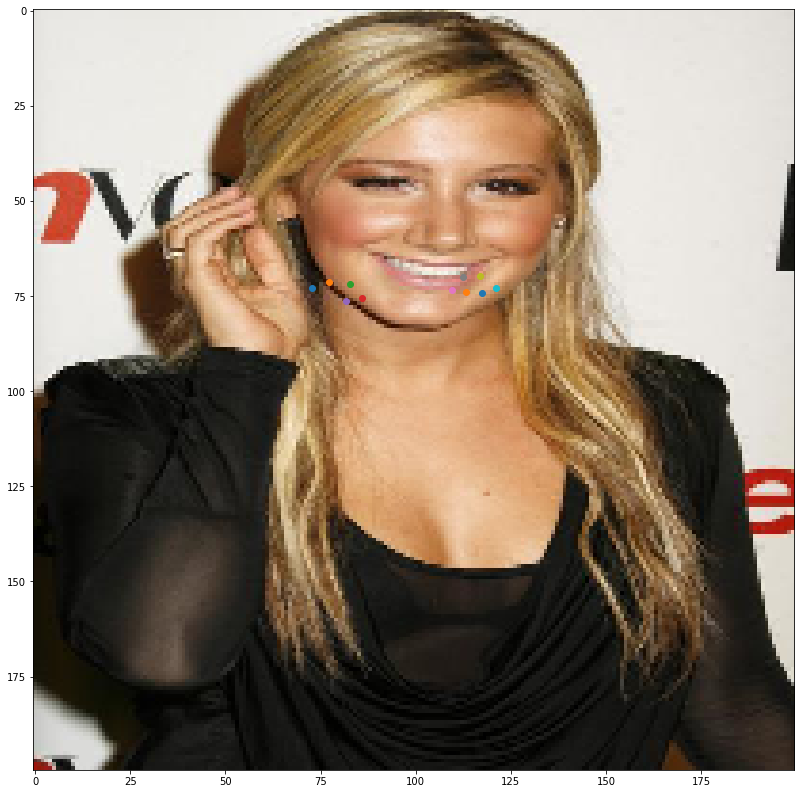

In [30]:
index = 0
fig, ax = plt.subplots(figsize=(14, 14))
pred = model.predict(np.array([X_test[index]]))
ax.imshow(X_test[index])
for j in range(0, 24, 2):
    ax.scatter(pred[0][j], pred[0][j + 1])
print(pred)